# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## Data Validation
This data set has 947 rows, 8 columns. I have validated all variables and I have made changes after validation. All the columns are just as described in the data dictionary:
* recipe: unique identifier of recipe without missing values. No cleaning is needed.
* calories: numeric with 52 missing values. Since it's skewed, I grouped by category and servings and filled the missing values with the median of each group's calories.
* carbohydrate: numeric with 52 missing values. Since it's skewed, I grouped by category and servings and filled the missing values with the median of each group's carbohydrate.
* sugar: numeric with 52 missing values. Since it's skewed, I grouped by category and servings and filled the missing values with the median of each group's sugar.
* protein: numeric with 52 missing values. Since it's skewed, I grouped by category and servings and filled the missing values with the median of each group's protein.
* category: 11 categories instead of 10 categories in the description. Replaced Chicken Breast with Chicken.
* servings: category without missing values, but contained characters added at the end of 2 of the unique values. Removed the added characters to add them to their corresponding values and converted to integer as described in the decription.
* high_traffic: 1 category instead of 2 categories with 373 missing null values. I replaced the null values with Low since it contains only High with no Low values.


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the csv file and viewing the first five rows
recipe = pd.read_csv("recipe_site_traffic_2212.csv")
recipe.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [2]:
#Checking for non null values
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [3]:
# Checking the number of missing values in the columns
recipe.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [4]:
# Checking the number of unique values and unique values in the category column
print(recipe['category'].nunique(),'\n',recipe['category'].unique())

11 
 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [5]:
# Replacing the Chicken Breast with Chicken and rechecking the unique values
recipe['category']=recipe['category'].str.replace('Chicken Breast','Chicken')
print(recipe['category'].nunique(),'\n',recipe['category'].unique())

10 
 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']


In [6]:
#Checking the number of unique values and unique values in the high_traffic column
print(recipe['high_traffic'].nunique(),'\n',recipe['high_traffic'].unique())

1 
 ['High' nan]


In [7]:
# Replacing the null values in the high_traffic column with Low
recipe['high_traffic']=recipe['high_traffic'].fillna('Low')

In [8]:
# Checking the number of unique values and unique values in the servings column
print(recipe['servings'].nunique(),'\n',recipe['servings'].unique())

6 
 ['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [9]:
# Removing the extra charaters in the servings column and converting to integer
recipe['servings']=recipe['servings'].str.replace(' as a snack','').astype('int')


In [10]:
print(recipe['servings'].unique(), recipe['servings'].dtype)

[6 4 1 2] int64


<Figure size 400x400 with 0 Axes>

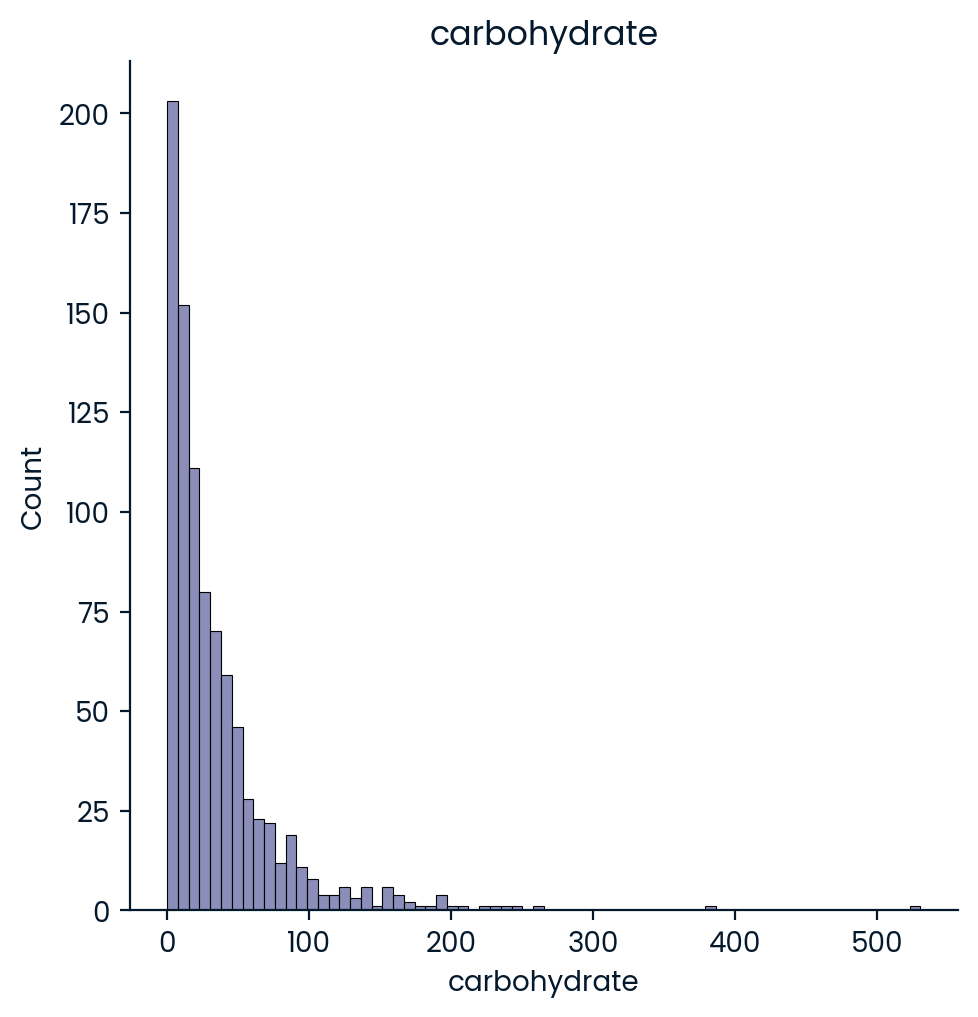

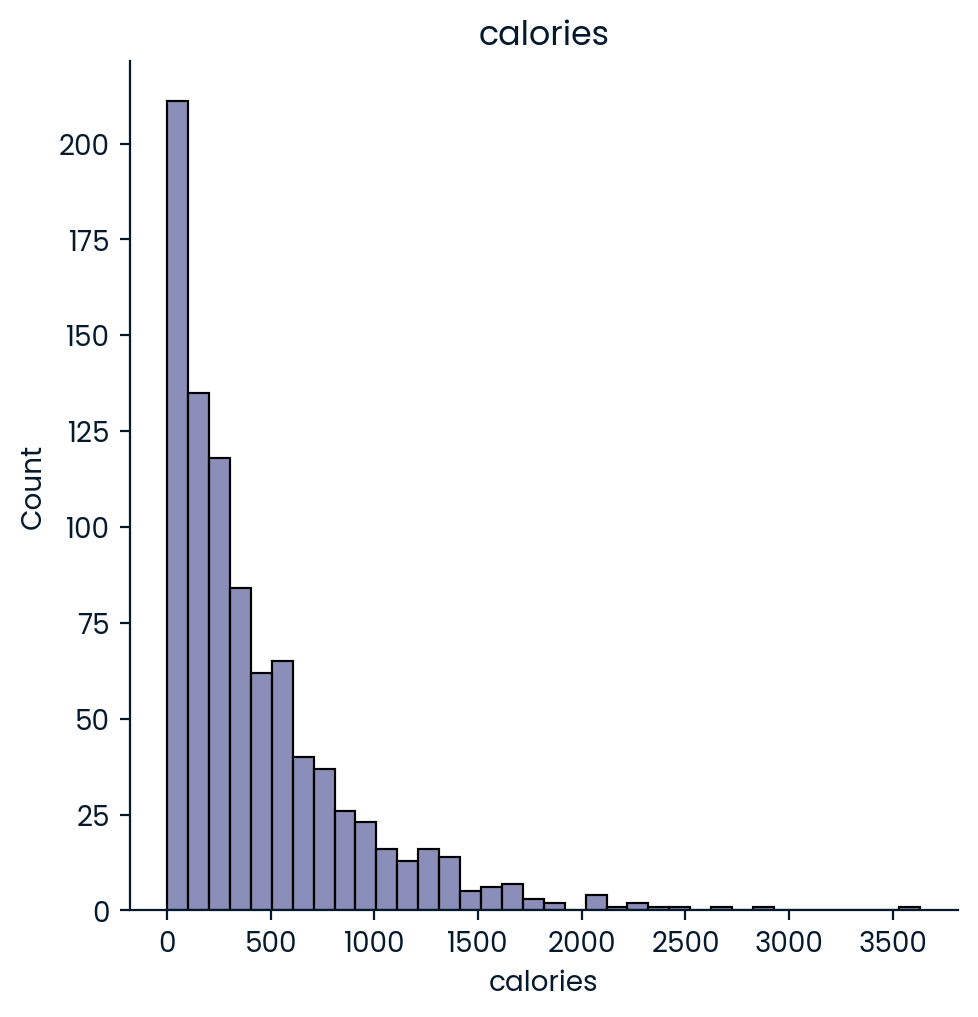

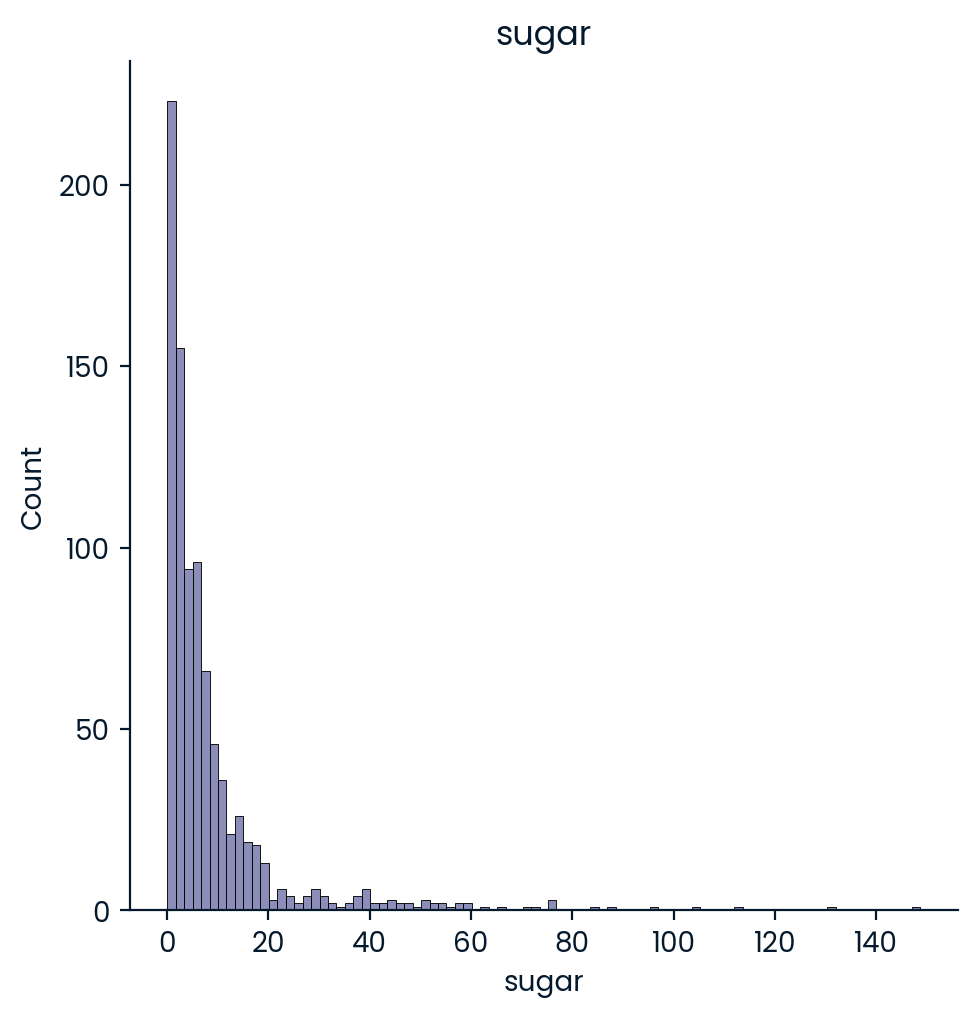

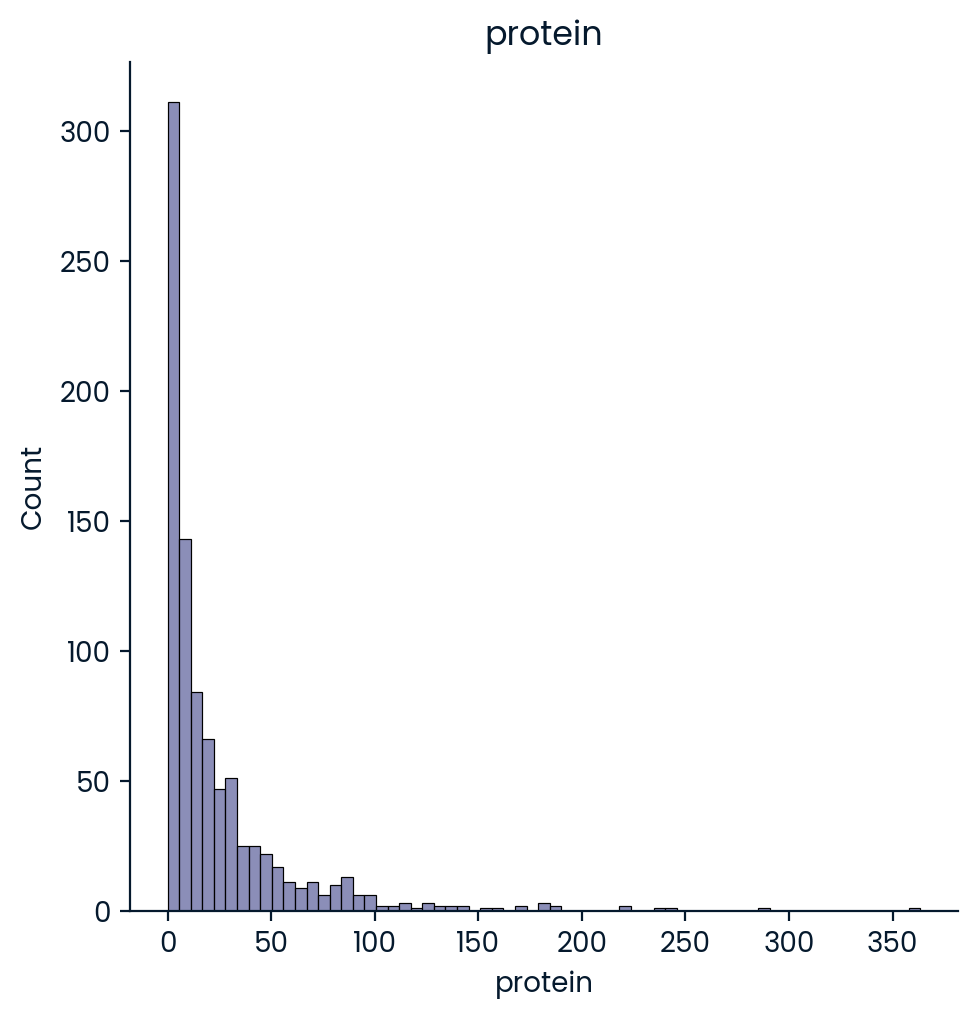

In [11]:
# Checking the type of distribution of the remaining columns with missing values
cols_to_fill=recipe[['carbohydrate','calories','sugar','protein']]
fig=plt.figure(figsize=[4,4])
for vals in cols_to_fill:
    sns.displot(cols_to_fill, x=vals)
    plt.title(vals)
    plt.show()


In [12]:
# Filling the missing values with medians of each group
for value in cols_to_fill:
    # Calculate medians grouped by 'servings' and 'category'
    medians = recipe.groupby(['category','servings'])[value].transform(lambda x:x.median()).round(2)
    # Fill NaN values with group-specific medians
    recipe[value].fillna(medians, inplace=True)   

In [13]:
# Verifying that there's no misssing values in the columns
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


## Exploratory Analysis
I have investigated the target variable and features of the recipes, and the relationship between target variable and features.

The recipes have more high traffic than low traffic

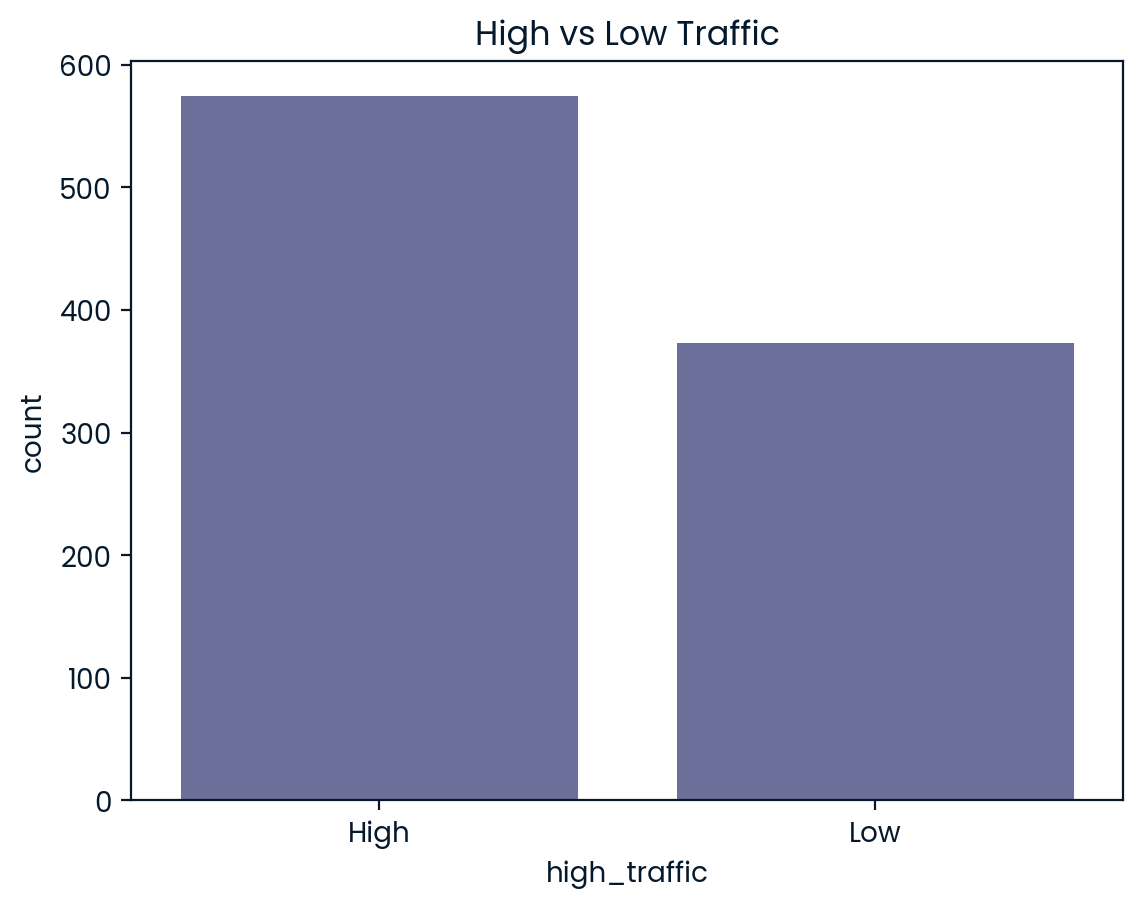

In [14]:
sns.countplot(recipe,x='high_traffic')
plt.title('High vs Low Traffic')
plt.show()

The most frequent recipes belong to the Chicken Category

In [15]:
category = recipe['category'].value_counts()
category

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

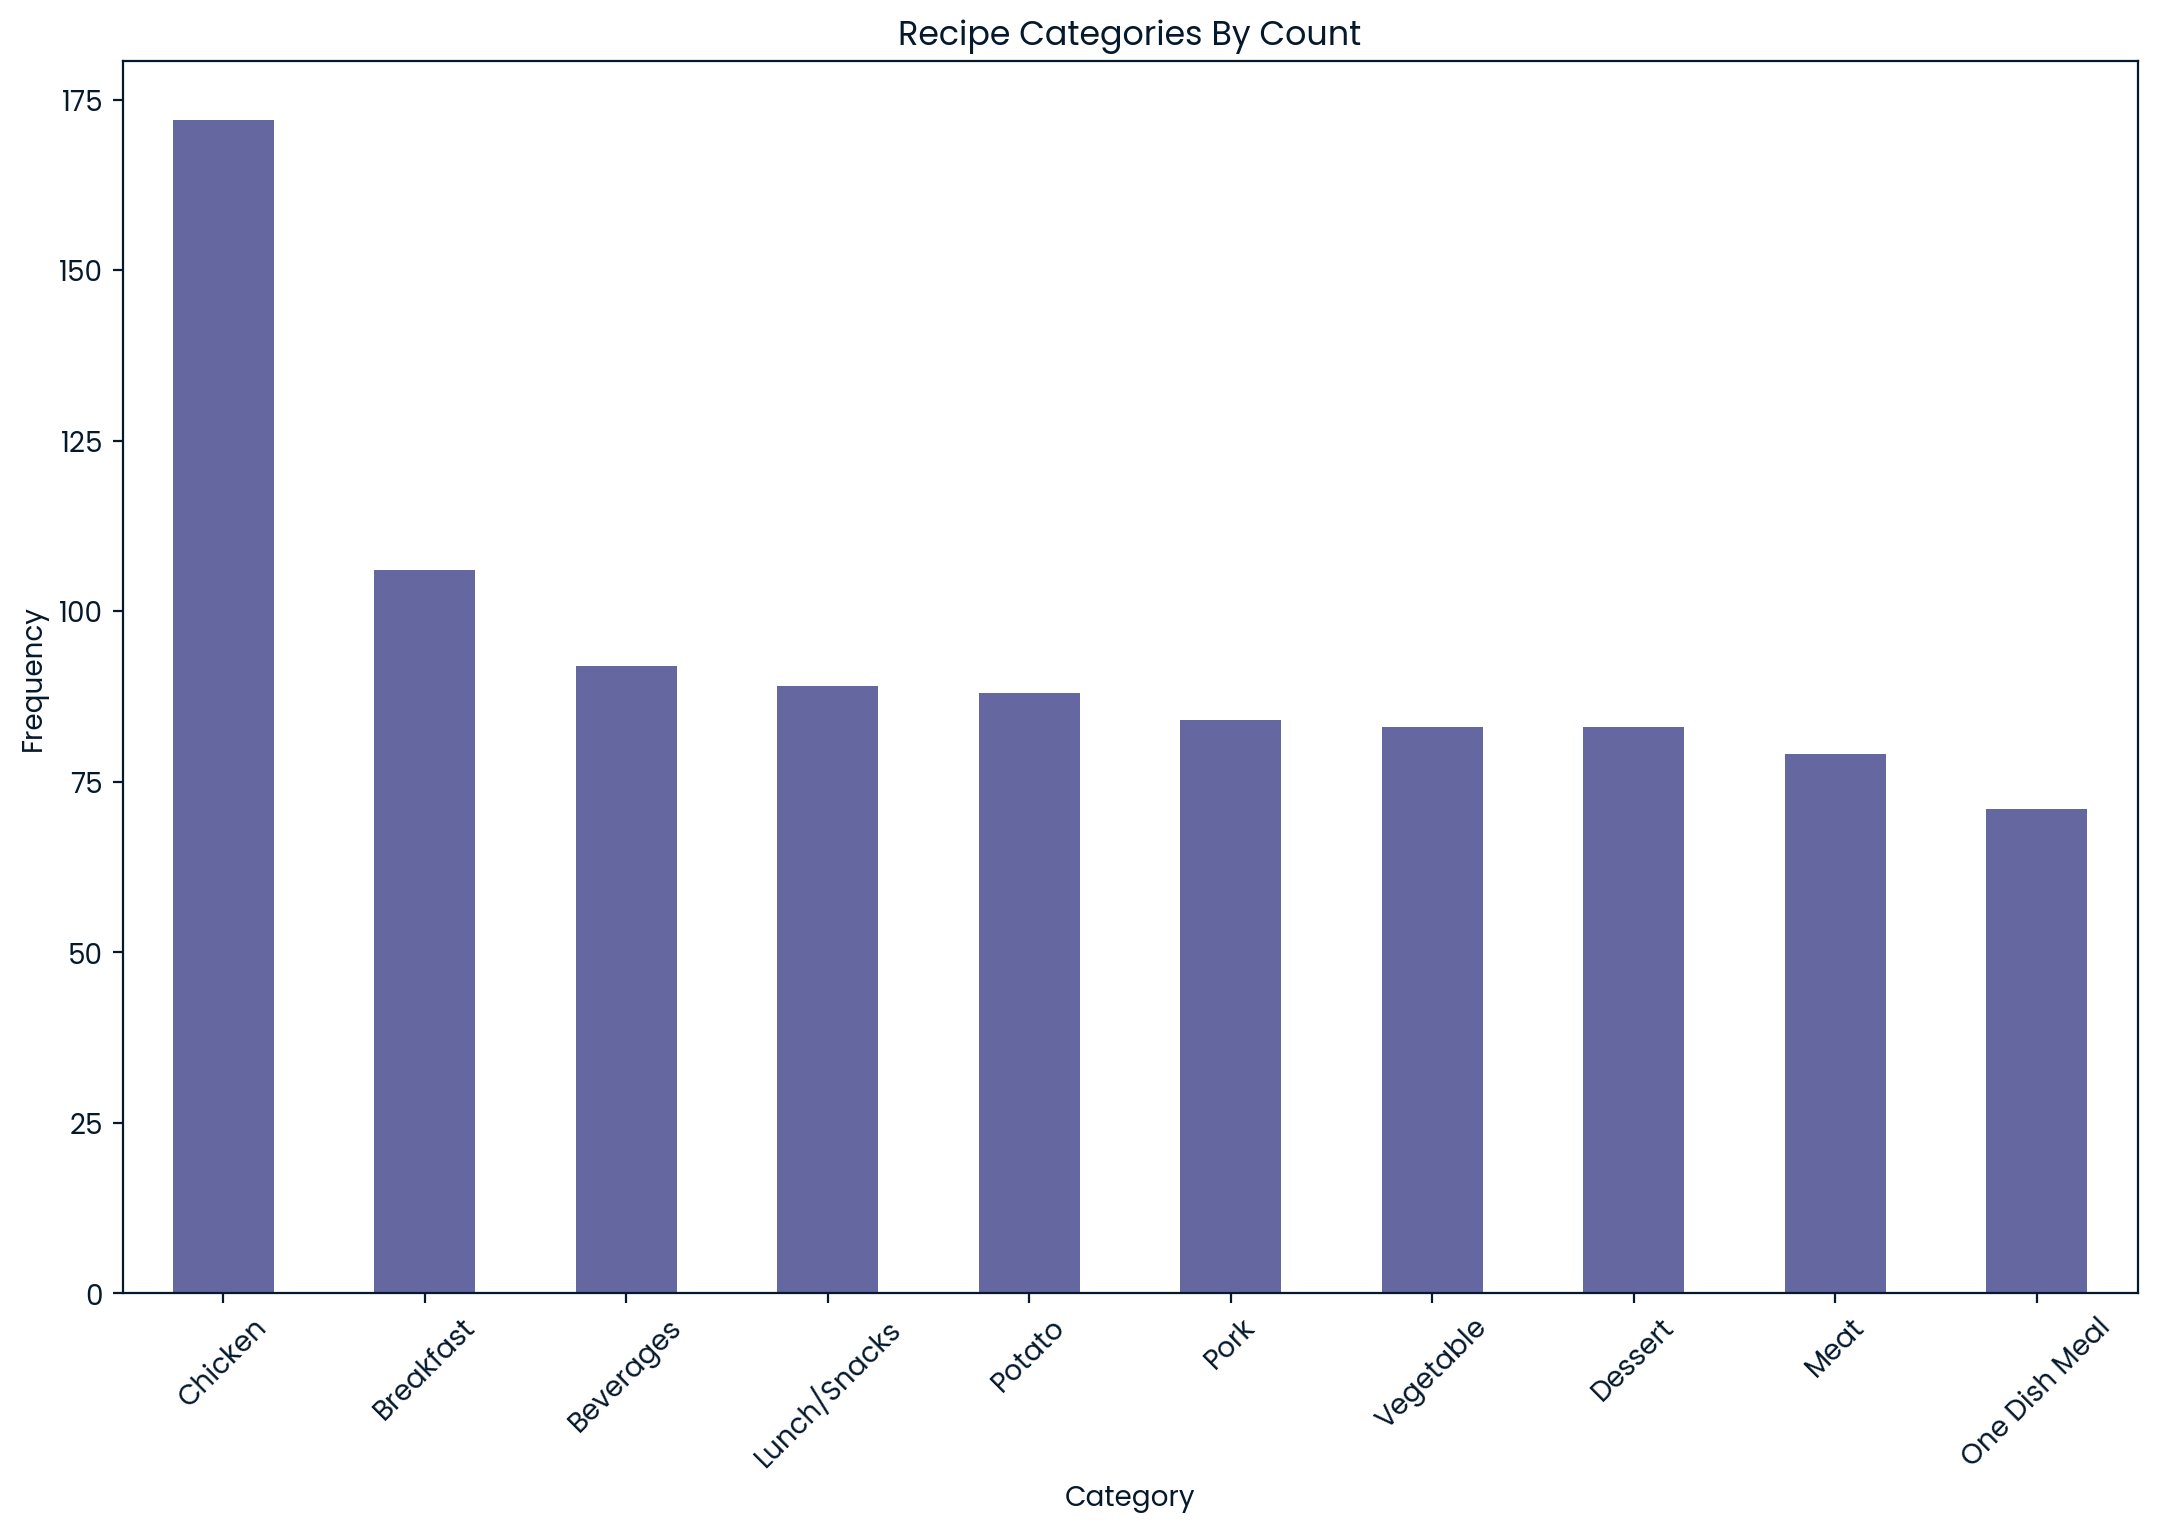

In [16]:
# Plot the frequency of cateory olumn
plt.figure(figsize=(13,8))
category.plot(kind= 'bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Recipe Categories By Count')
plt.xticks(rotation=45)
plt.show()


The recipe with 4 servings has the most occurrence frequency

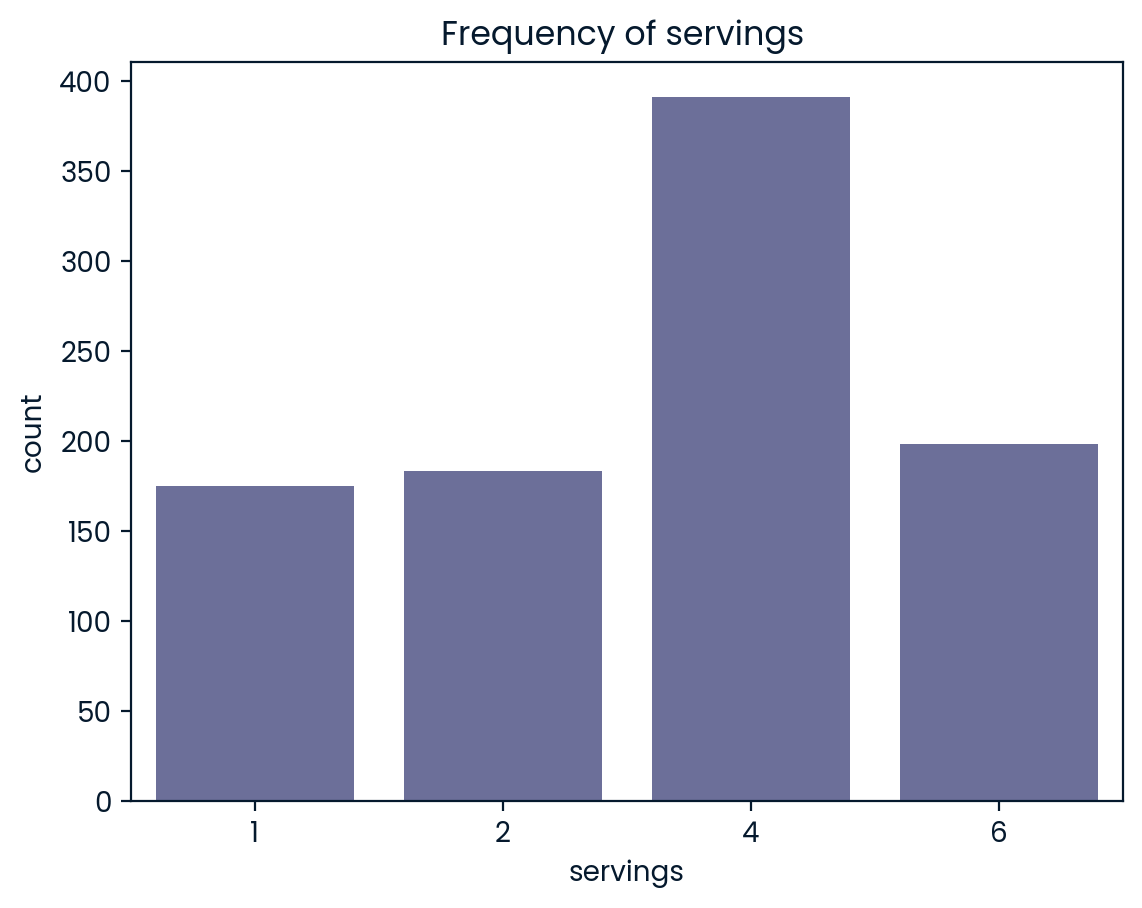

In [17]:
sns.countplot(recipe,x='servings')
plt.title('Frequency of servings ')
plt.show()

For each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic, so this feature doesn't have a big influence on target variable.

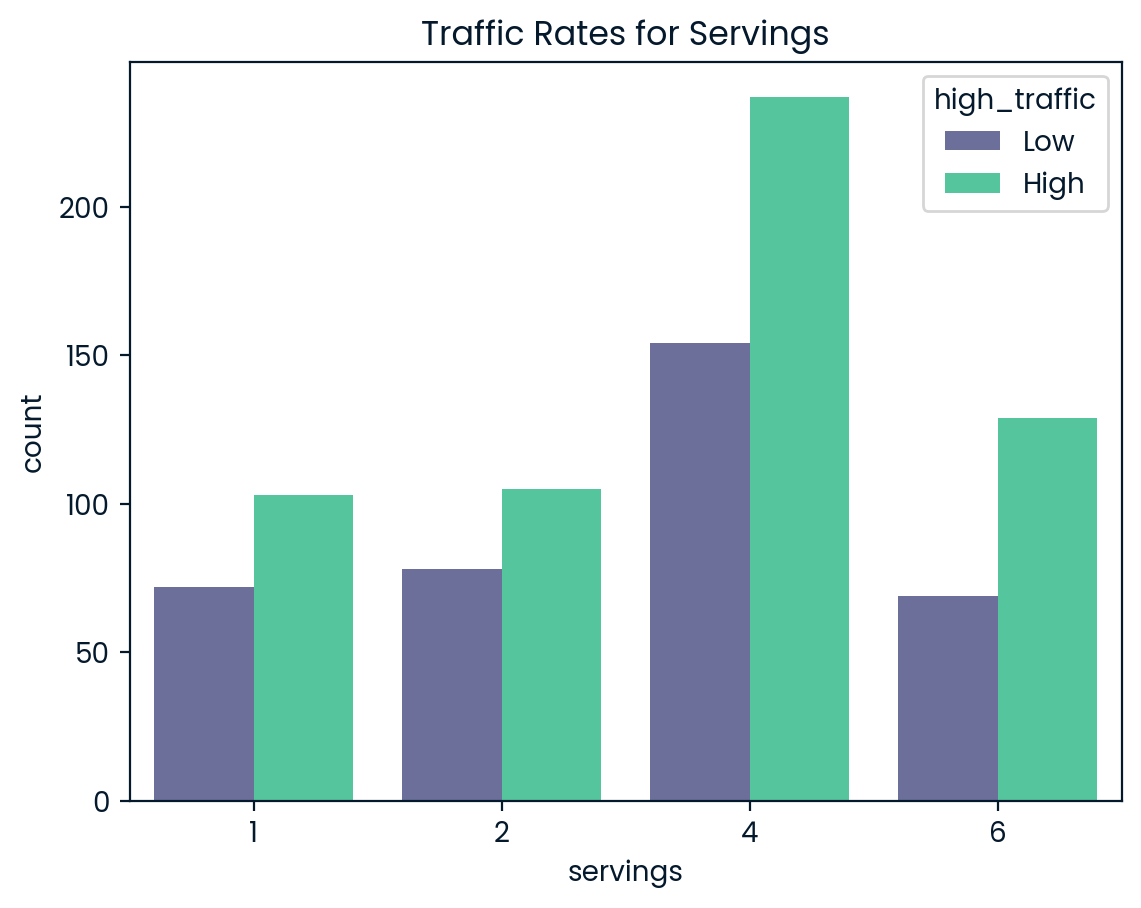

In [18]:
sns.countplot(recipe, x="servings", hue="high_traffic")
plt.title('Traffic Rates for Servings')
plt.show()

Pork,Potato, and Vegetable categories have a lot more recipes with high traffic than with low traffic.

One Dish Meal, Lunch/Snacks, Meat, Dessert categories have just more recipes with high traffic than with low traffic.

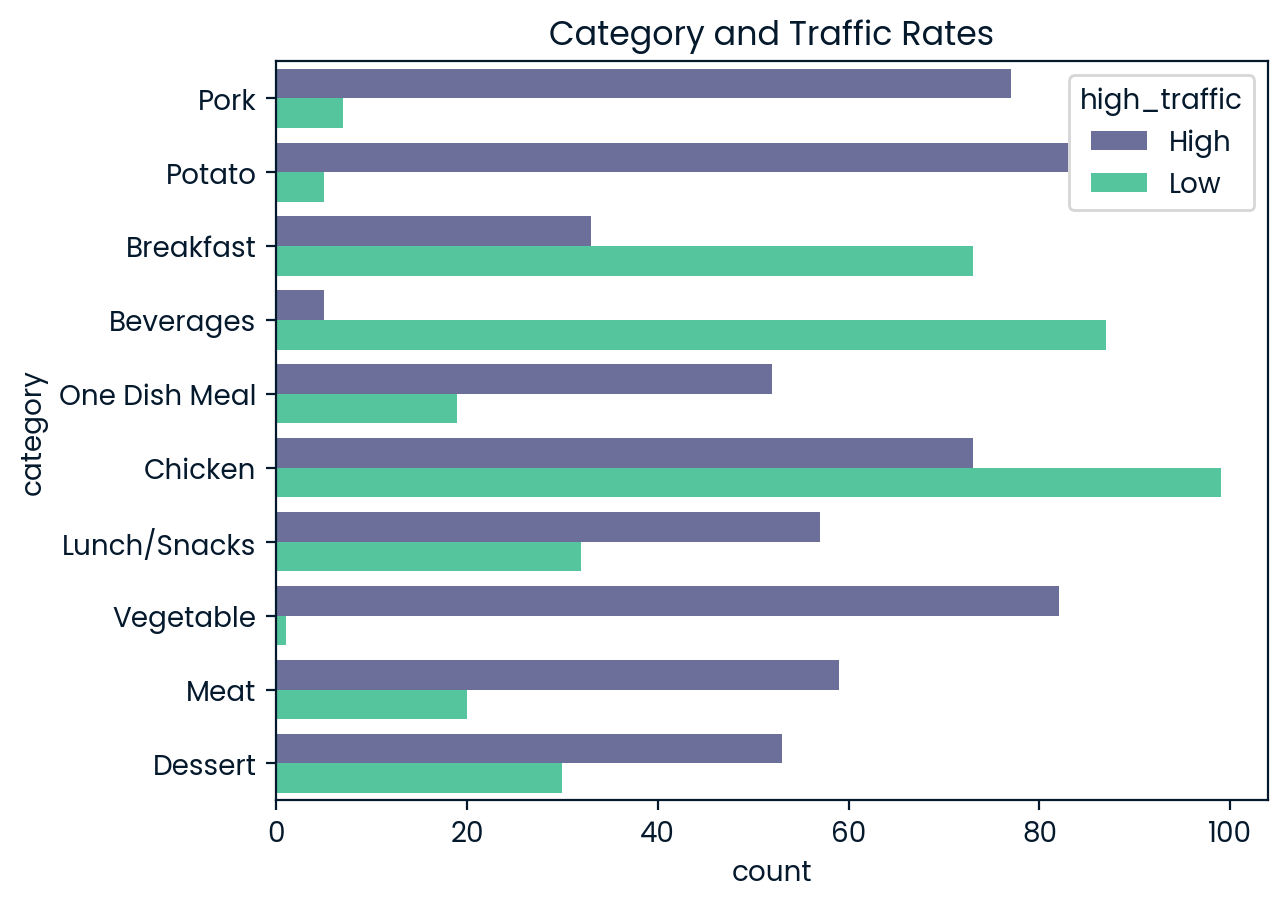

In [19]:
sns.countplot(data=recipe, y='category',hue='high_traffic')
plt.title('Category and Traffic Rates')
plt.show()

The ingredients and the calories are slightly correlated

<Figure size 1200x800 with 0 Axes>

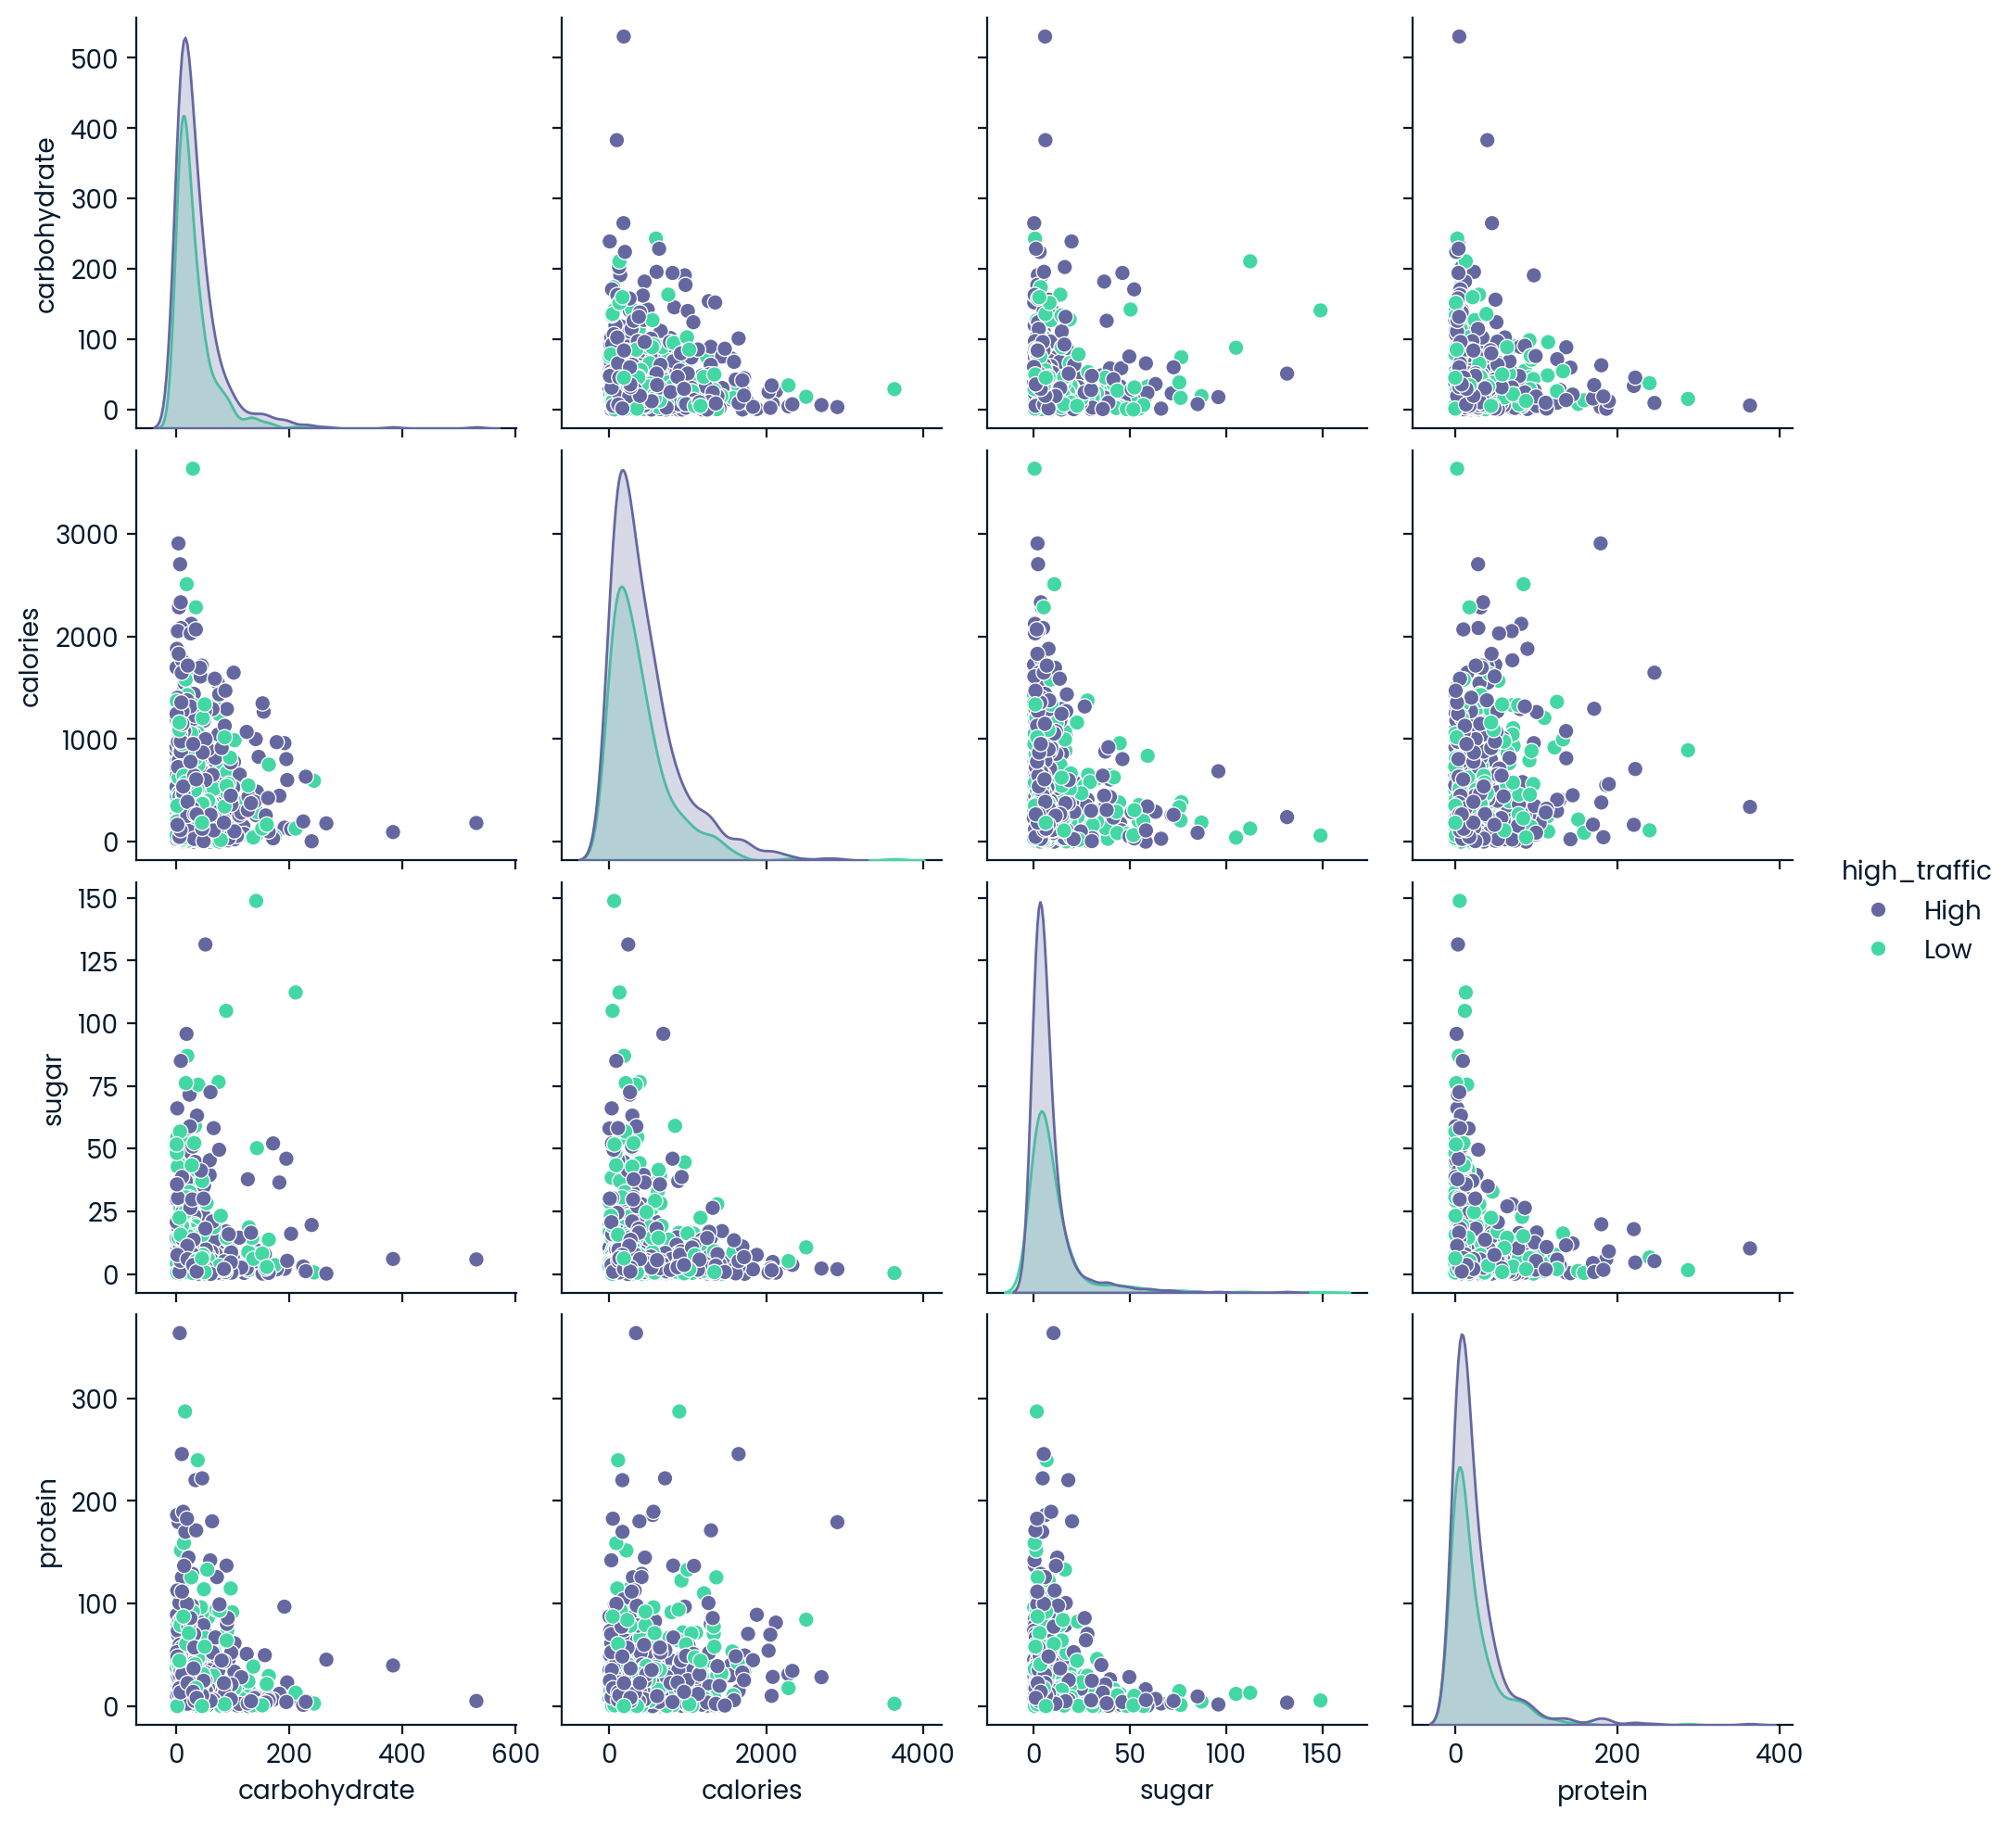

In [20]:
r=recipe[['carbohydrate','calories','sugar','protein','high_traffic']]
fig=plt.figure(figsize=(12, 8))
sns.pairplot(r,hue='high_traffic')
plt.show()

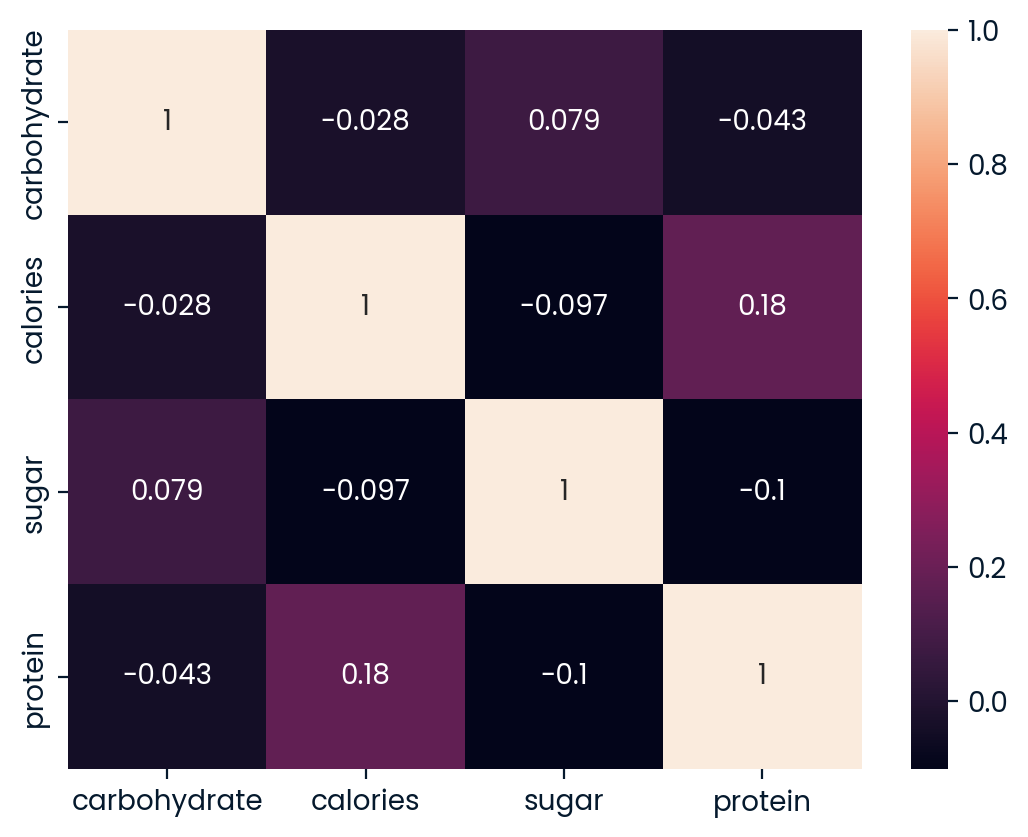

In [21]:
sns.heatmap(r.corr(),annot=True)
plt.show()

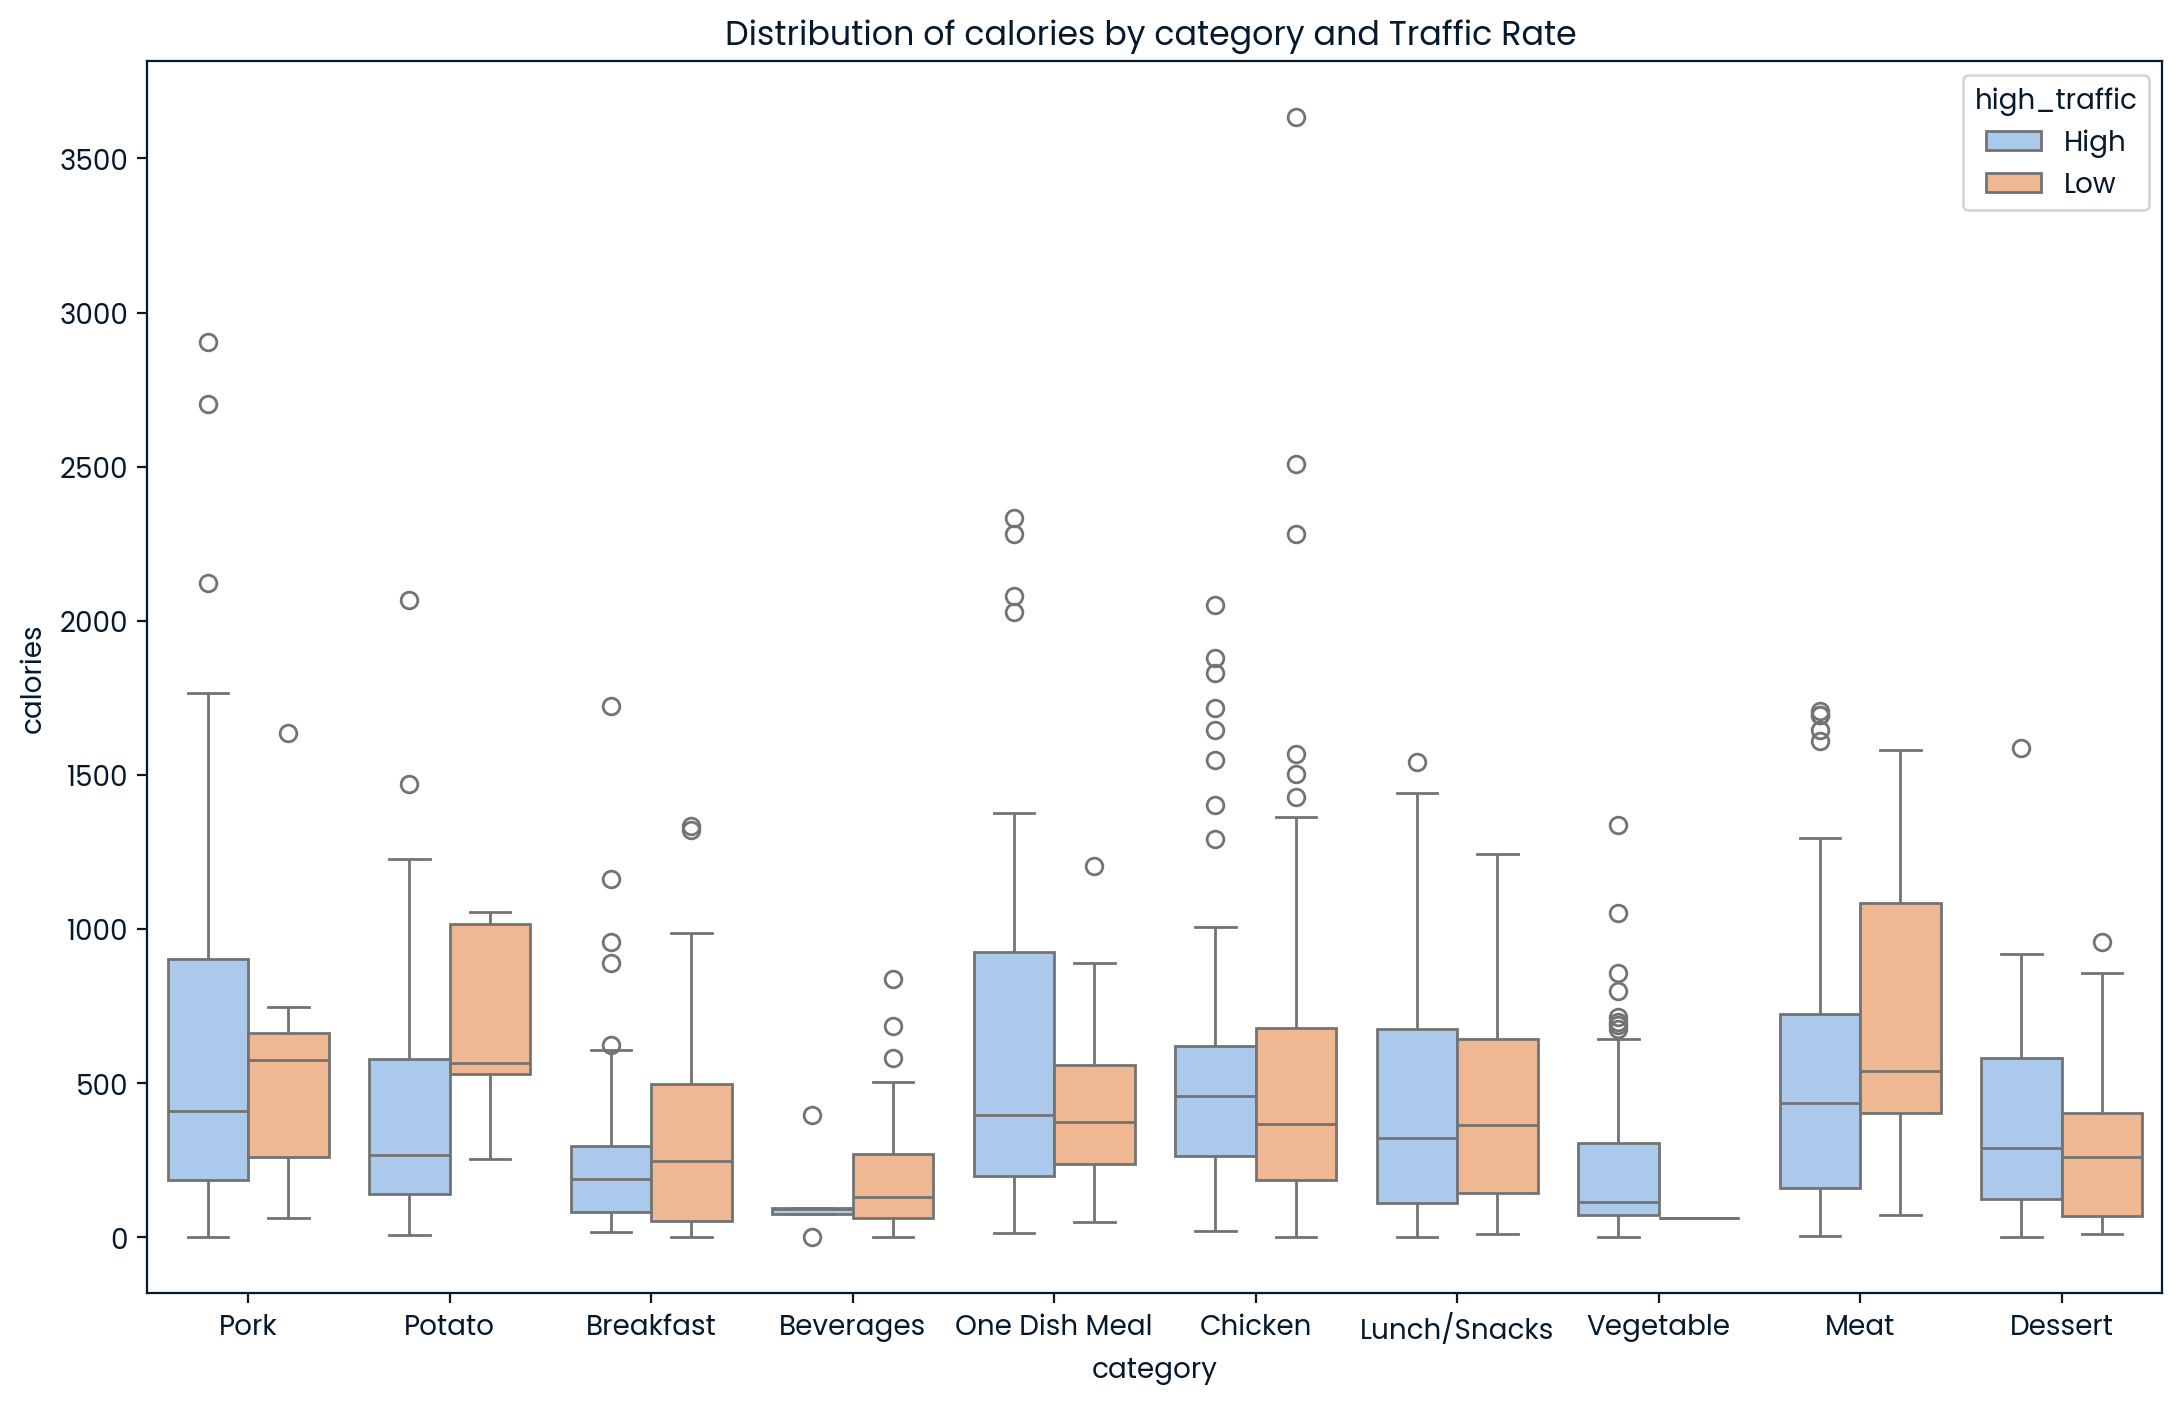

In [22]:
fig=plt.figure(figsize=[13,8])
sns.boxplot(data=recipe,x='category',y='calories',hue='high_traffic', palette='pastel')
plt.title('Distribution of calories by category and Traffic Rate ')
plt.show()

## Model Development 
Predicting the high_traffic is a binary classification problem in machine learning. I am choosing the LogisticRegression because there are two outcomes which is the high and low. The comparison model I am choosing is the RandomForestClassifier because it is easy to interpret with independence from outliers.

For the evaluation, I am choosing:\
accuracy: the number of correctly classified data instances over the total number of data instances\
precision: a measure of how many of the positive predictions made are correct (true positives)\
recall: a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. It is sometimes also referred to as Sensitivity.\
f1_score: a measure combining both precision and recall.\
roc_curve: shows how the model makes decisions at different levels of certainty\
roc_auc_score: measures the ability of a binary classifier to distinguish between classes and confusion_matrix to evaluate the model.

## Prepare Data for Modelling
To enable modelling, we chose  calories, carbohydrate, sugar, protein, category, servings, Beverages, Breakfast, Chicken, Dessert, Lunch/Snacks, Meat, One Dish Meal, Pork, Potato, Vegetable as features, high_traffic as target variables. I also have made the following changes:

* Normalize the numeric features
* Performed One-hot encoding on the category column
* Convert the categorical variables into numeric features
* Split the data into a training set and a test set

In [23]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import KFold,train_test_split, cross_val_score, GridSearchCV

In [24]:
# Checking the summary statistics of the numeric columns
recipe.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,432.100676,34.456969,8.907656,23.961056,3.477297
std,273.519652,441.604406,42.898394,14.395541,35.491928,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,113.905000,9.135000,1.795000,3.425000,2.000000
50%,474.000000,299.320000,21.480000,4.460000,11.200000,4.000000
75%,710.500000,576.635000,43.230000,9.565000,30.660000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


In [25]:
# Converting non numeric columns to numeric and dropping the recipe column which is of no use
recipe.drop('recipe',axis=1,inplace=True)
dummy=pd.get_dummies(recipe['category'])
recipe['high_traffic']= np.where(recipe['high_traffic']=='High',1,0)
recipe['high_traffic'].dtype

for  d in dummy.columns:
    dummy[d]=dummy[d].astype(int)
recipee=pd.concat([recipe,dummy],axis=1)
recipee.drop('category',axis=1,inplace=True)

recipee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calories       947 non-null    float64
 1   carbohydrate   947 non-null    float64
 2   sugar          947 non-null    float64
 3   protein        947 non-null    float64
 4   servings       947 non-null    int64  
 5   high_traffic   947 non-null    int64  
 6   Beverages      947 non-null    int64  
 7   Breakfast      947 non-null    int64  
 8   Chicken        947 non-null    int64  
 9   Dessert        947 non-null    int64  
 10  Lunch/Snacks   947 non-null    int64  
 11  Meat           947 non-null    int64  
 12  One Dish Meal  947 non-null    int64  
 13  Pork           947 non-null    int64  
 14  Potato         947 non-null    int64  
 15  Vegetable      947 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 118.5 KB


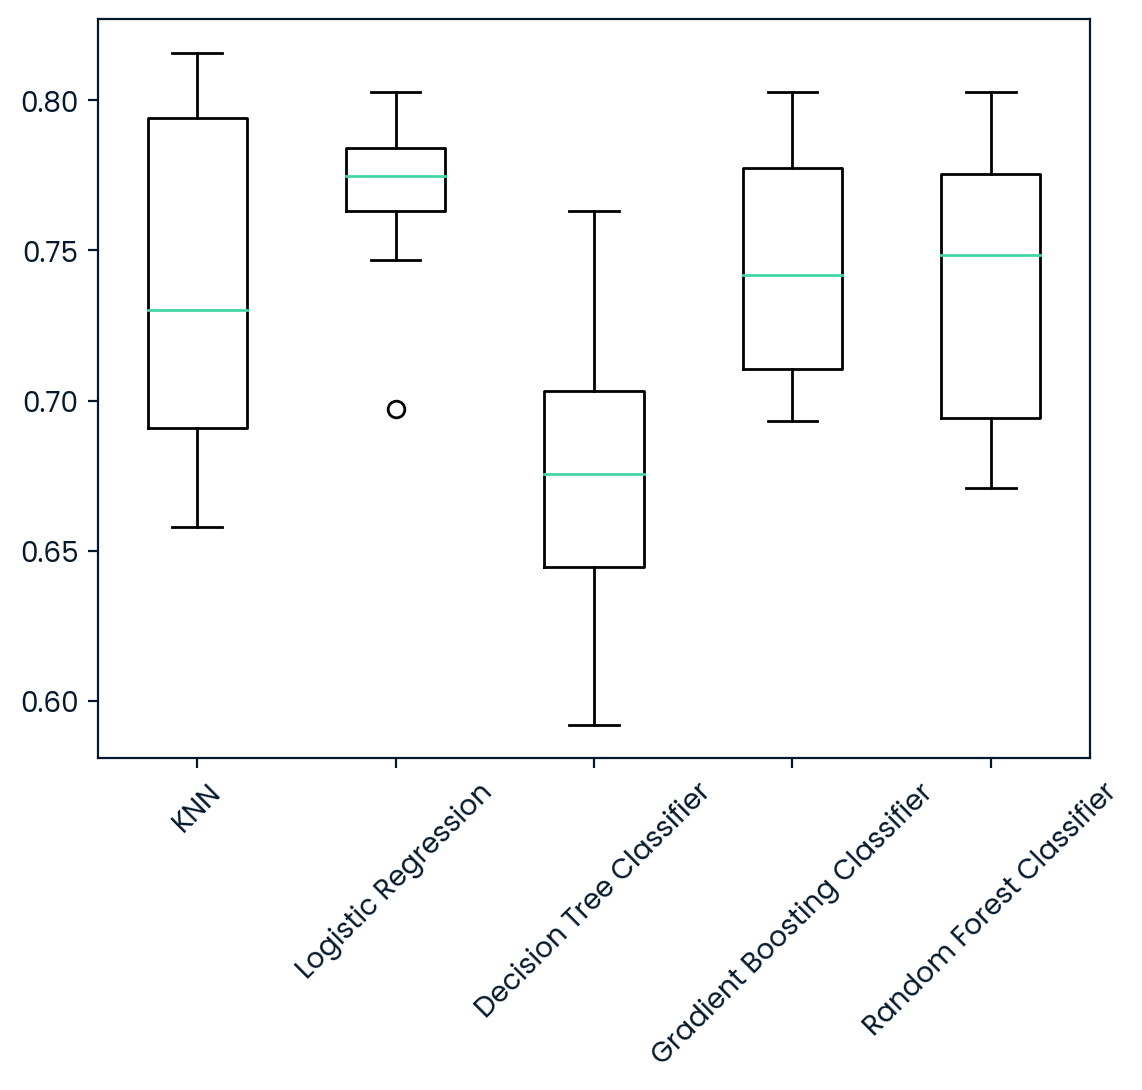

In [26]:
# Creating my target variables and features and selecting the best model

X=recipee.drop('high_traffic',axis=1)
y=recipee['high_traffic']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state=12)
scaler= MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {'KNN':KNeighborsClassifier(),
'Logistic Regression':LogisticRegression(),
'Decision Tree Classifier':DecisionTreeClassifier(),
'Gradient Boosting Classifier': GradientBoostingClassifier(),
'Random Forest Classifier':RandomForestClassifier()}

training={}
test={}
for i,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    training[i]=model.score(X_train_scaled,y_train)
    test[i]=model.score(X_test_scaled,y_test)
    
kf = KFold(n_splits=10, shuffle=True, random_state=12)
cv_scores={}
for model in models.values():
    cv=cross_val_score(model,X_train_scaled,y_train,cv=kf)
    cv_scores[model]=cv

plt.boxplot(cv_scores.values(), labels= models.keys())
plt.xticks(rotation=45)
plt.show()

In [27]:
print('training score: {}'.format(training))
print('\n')
print('test score: {}'.format(test))

training score: {'KNN': 0.39365918097754293, 'Logistic Regression': 0.7701453104359313, 'Decision Tree Classifier': 0.5653896961690885, 'Gradient Boosting Classifier': 0.6063408190224571, 'Random Forest Classifier': 0.7635402906208718}


test score: {'KNN': 0.39473684210526316, 'Logistic Regression': 0.7315789473684211, 'Decision Tree Classifier': 0.531578947368421, 'Gradient Boosting Classifier': 0.6105263157894737, 'Random Forest Classifier': 0.7052631578947368}


# Logistic Regression Model

In [28]:
# Instantiating my model with the best parameters
logreg=LogisticRegression(C= 0.001,max_iter=300, multi_class='multinomial', penalty=None, solver='sag')
logreg.get_params()

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 300,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': None,
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
# Checking for the best parameters
# params_logreg ={
#     'penalty':['l1', 'l2', 'elasticnet', None],
#     'multi_class':['auto', 'ovr', 'multinomial'],
#     'C':np.arange(0.001,0.1),
#     'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# }
# gridlogreg=GridSearchCV(estimator=logreg,param_grid=params_logreg,cv=10,n_jobs=1)
# gridlogreg.fit(X_train_scaled,y_train)
# gridlogreg.best_params_
logreg.fit(X_train_scaled,y_train)
logregtrain_pred=logreg.predict(X_train_scaled)
logreg_pred=logreg.predict(X_test_scaled)
logreg_pred_proba=logreg.predict_proba(X_test_scaled)[:,1]
print('training accuracy: ',accuracy_score(logregtrain_pred,y_train))
print('testing accuracy: ',accuracy_score(logreg_pred,y_test))

training accuracy:  0.774108322324967
testing accuracy:  0.7210526315789474


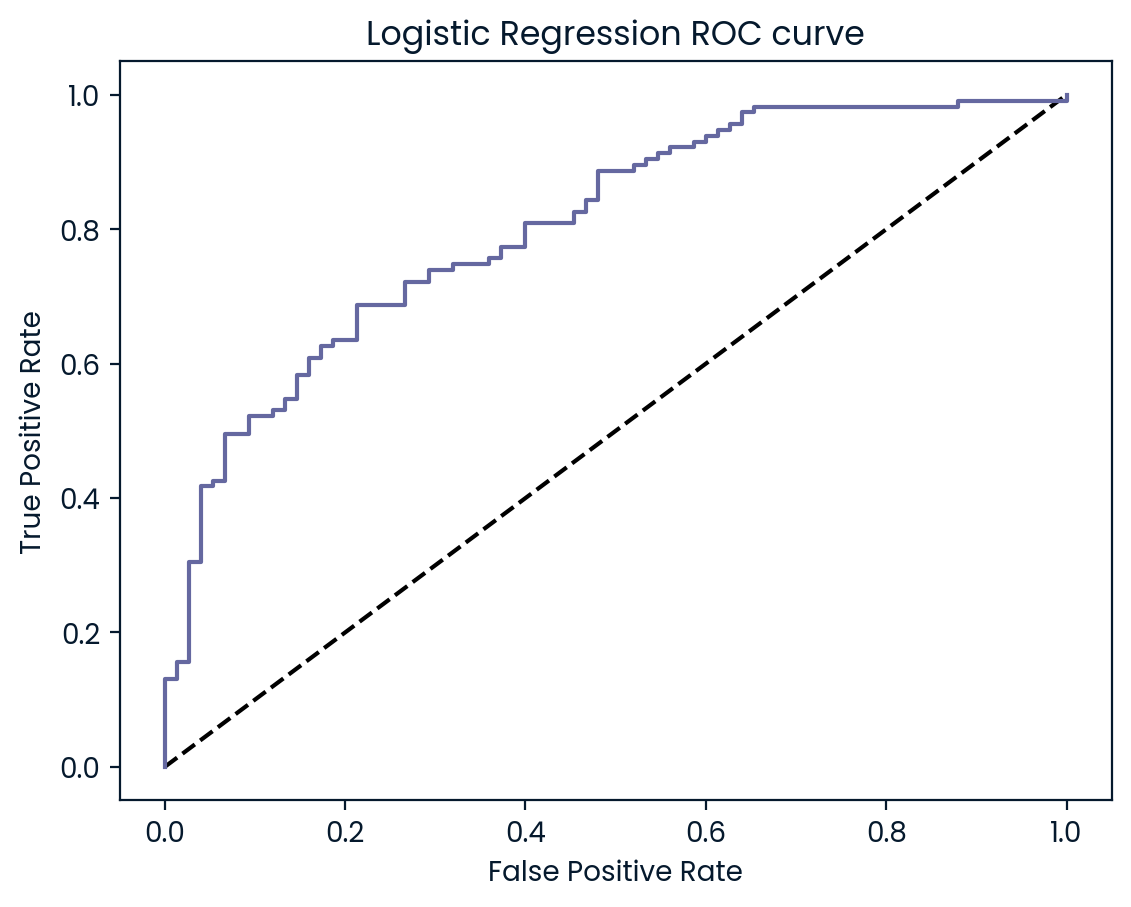

In [30]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [31]:
# Calculating the area under the curve
roc_auc_score(y_test,logreg_pred_proba)

0.8046376811594202

In [32]:
print("Confusion matrix:\n", confusion_matrix(y_test, logreg_pred))
print("Classification report:\n", classification_report(y_test, logreg_pred))

Confusion matrix:
 [[53 22]
 [31 84]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        75
           1       0.79      0.73      0.76       115

    accuracy                           0.72       190
   macro avg       0.71      0.72      0.71       190
weighted avg       0.73      0.72      0.72       190



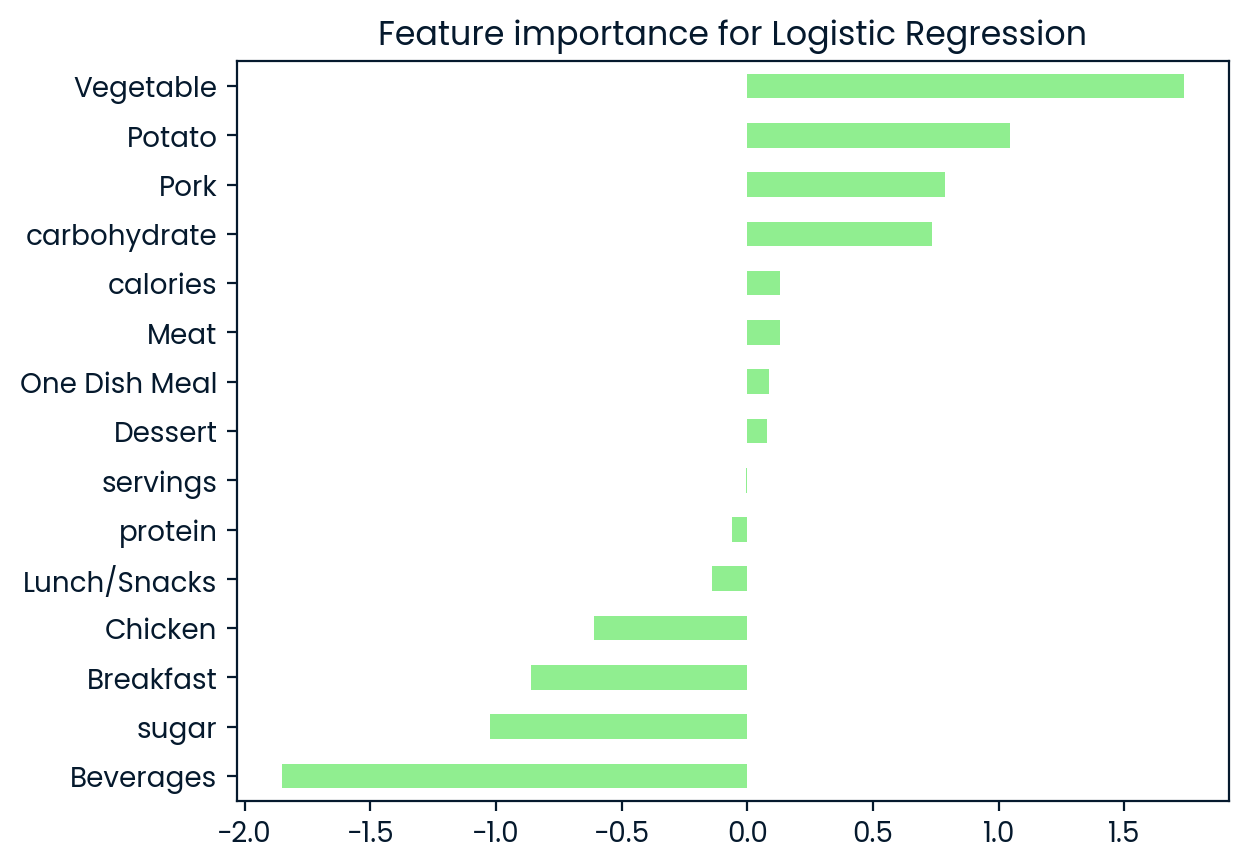

In [33]:
# Logistic Regression feature importance
logreg_importance=pd.Series(logreg.coef_[0],index=X.columns)
sorted_importances_logreg=logreg_importance.sort_values()
sorted_importances_logreg.plot(kind='barh',color='lightgreen')
plt.title("Feature importance for Logistic Regression")
plt.show()

# Random Forest Classifier

In [34]:
# Instantiation Random Forest Classifier Model
rf=RandomForestClassifier(max_leaf_nodes=8,max_depth=5,n_estimators=900,random_state=12)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 8,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 900,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

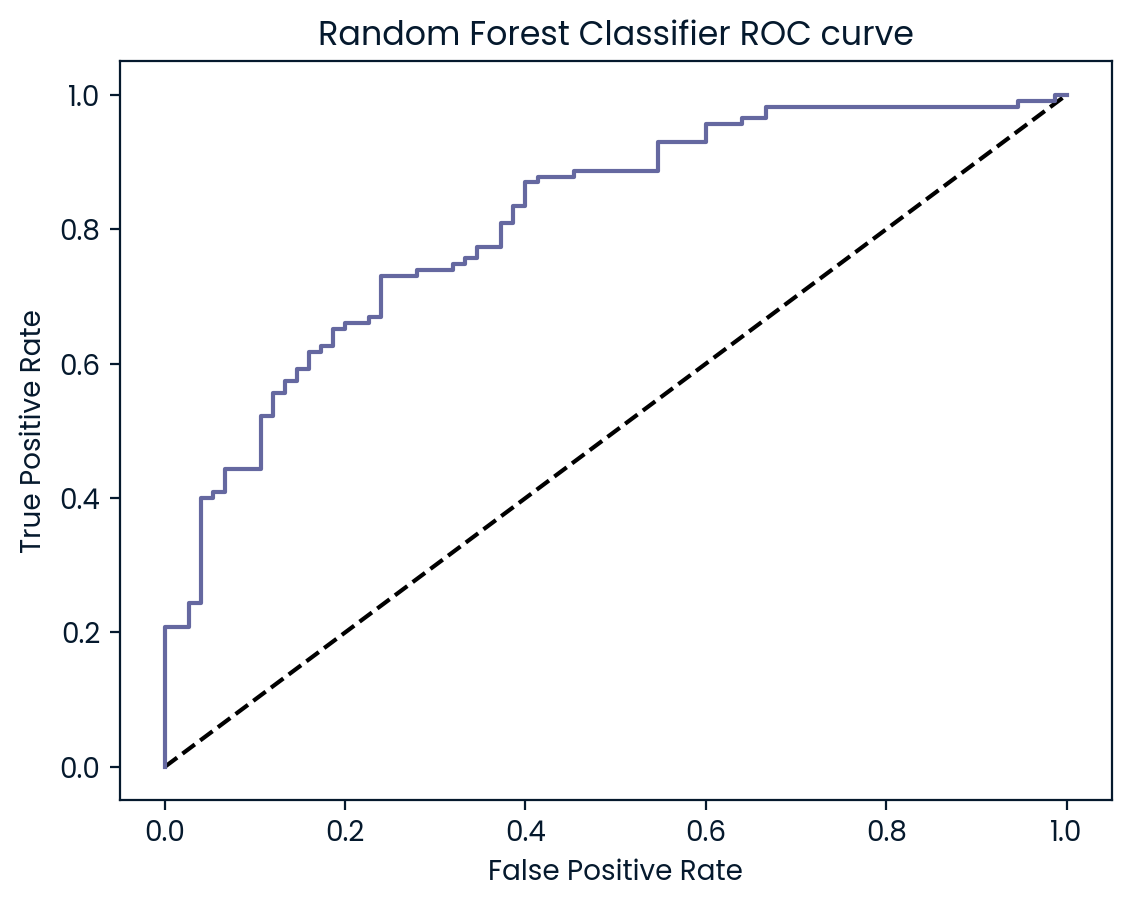

In [35]:
# Checking for the best parameters
# params_rf ={
#     'criterion':['gini', 'entropy', 'log_loss'],
#     'max_features':['sqrt', 'log2', None],
#     'max_depth':np.arange(1,10,1),
#     'n_estimators':np.arange(100,1000,100),
#     'class_weight':['balanced', 'balanced_subsample']
# }
# gridrf=GridSearchCV(estimator=rf,param_grid=params_rf,cv=10,n_jobs=1)
# gridrf.fit(X_train_scaled,y_train)
# gridrf.best_params_
rf.fit(X_train_scaled,y_train)
rf_pred_train=rf.predict(X_train_scaled)
rf_pred=rf.predict(X_test_scaled)
rf_pred_proba=rf.predict_proba(X_test_scaled)[:,1]

fpr,tpr,threshold=roc_curve(y_test,rf_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC curve')
plt.show()

In [36]:
print('training accuracy: ',accuracy_score(rf_pred_train,y_train))
print('testing accuracy: ',accuracy_score(rf_pred,y_test))

training accuracy:  0.7793923381770145
testing accuracy:  0.7631578947368421


In [37]:
# Calculating the area under curve
roc_auc_score(y_test,rf_pred_proba)

0.8117101449275362

In [38]:
print("Confusion matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification report:\n", classification_report(y_test, rf_pred))

Confusion matrix:
 [[ 45  30]
 [ 15 100]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        75
           1       0.77      0.87      0.82       115

    accuracy                           0.76       190
   macro avg       0.76      0.73      0.74       190
weighted avg       0.76      0.76      0.76       190



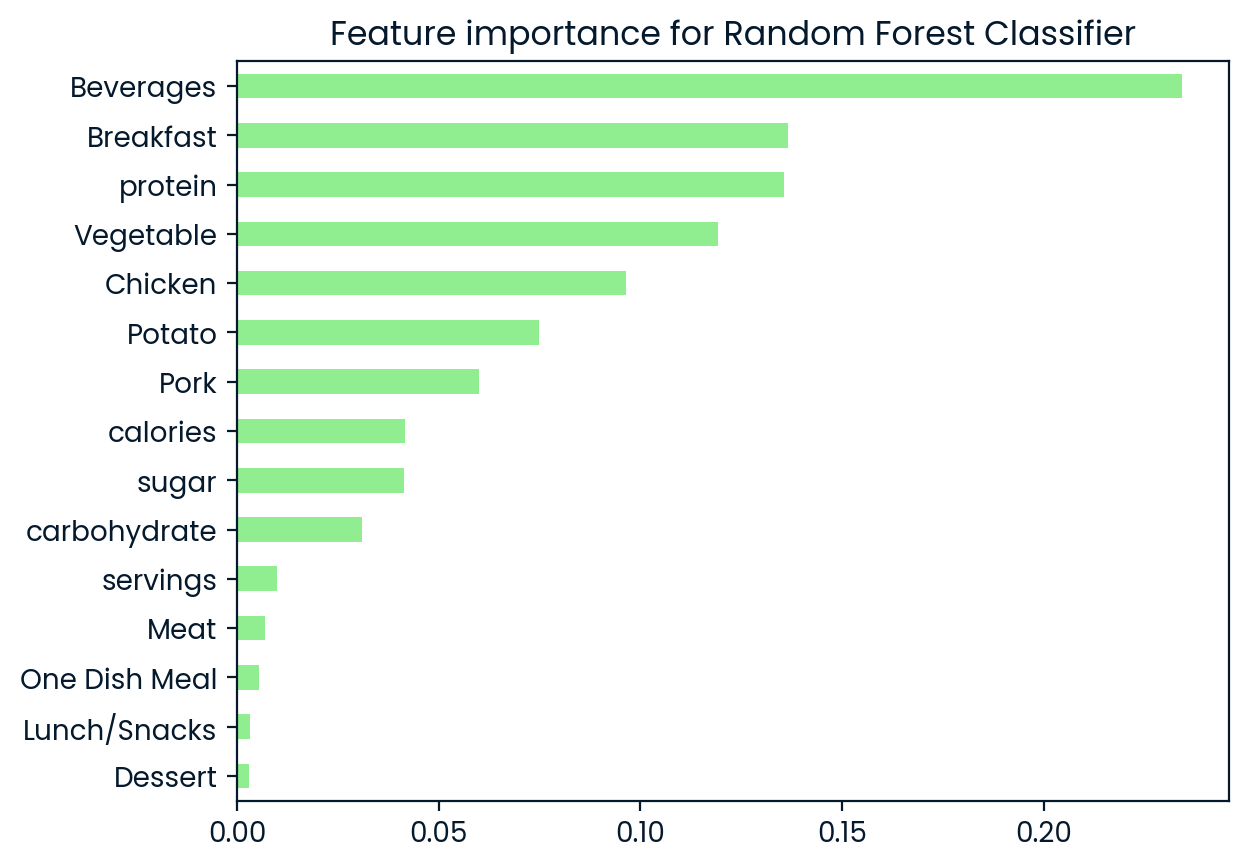

In [39]:
# Checking Feature importance for random Forest
rf_importance=pd.Series(rf.feature_importances_,index=X.columns)
sorted_importances_rf=rf_importance.sort_values()
sorted_importances_rf.plot(kind='barh',color='lightgreen')
plt.title("Feature importance for Random Forest Classifier")
plt.show()

### Model Evaluation
* The precision, recall, f1_score and roc_auc_score of the Logistic Regression model are 0.79, 0.73, 0.76, 0.80 and that of Random Forest Classifier are 0.77, 0.87, 0.82, 0.81 respectively.

* The roc_curve for Logistic regression is below 1 while the roc_curve for Random Forest Classifier is above 1 which shows that this model performs better than random guessing.

Satisfying more than 80% in recall, f1_score, roc_auc_score with precision being close to 80% shows that the Random Forest Classifier model fits the features better and has less error in predicting values.

### Evaluate by Business Criteria
The inital goal was for the model to predict within 80% accuracy,
The company wants to increase an accuracy of prediction of high traffic. Therefore, we would consider using accuracy of predictions which predicted high traffic as a KPI to compare 2 models again. The higher the percentage, the better the model performs. The Random Forest Classifier model has 76% of the accuracy whereas the accuracy of Logistic Regression model is lower (72%). 

### Recommendations
The Random Forest Classifier model was able to predict within 76% accuracy what the most popular will be. Based on the plot showing the feature importances, We see that most important features are the Beverages category, Breakfast category and protein. It is my recommendation that Tasty Bytes produce recipes that focus on these and ensure that their dishes have high protein content with lower calories and sugars.

In addition, based on our Exploratory analysis, they should focus on recipes in the categories of breakfast, beverages and chicken to help increase traffic to the website.

The 80% accuracy of the model can be accomplished with better data collection. Due to a high volume of missing data, features had to be engineered within the model so that it would be able to predict on the values.